In [ ]:
import torch
import os
from pathlib import Path
os.environ["MKL_SERVICE_FORCE_INTEL"] = "1"
os.environ["MUJOCO_GL"] = "egl"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["D4RL_SUPPRESS_IMPORT_ERROR"]="1"
import matplotlib.pyplot as plt
import imageio
import gym
import d4rl
from disrep4rl.environments.metaworld_dm_env import make_metaworld
from mujoco_py.generated import const
import numpy as np

In [ ]:
print(gym.envs.registry.all())

# Adroit Hand

In [35]:
env = gym.make("hammer-human-longhorizon-v1")

In [ ]:
# Record videos of adroit hand

hand_ids = list(range(7, 52))
import numpy as np
env.reset()

frames = [env.sim.render(512,512,camera_name='fixed')[::-1, ::-1]]

seg = env.sim.render(512,512,segmentation=True,camera_name='fixed')[::-1, ::-1]
types = seg[:,:,0]
ids = seg[:,:,1]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, list(hand_ids)))
masks = [robot_mask]

done = False
total_reward = 0
while not done:
    _, reward, done, _ = env.step(env.action_space.sample())
    total_reward += reward
    frames.append(env.sim.render(512,512,camera_name='fixed')[::-1, ::-1])

    seg = env.sim.render(512,512,segmentation=True,camera_name='fixed')[::-1, ::-1]
    types = seg[:,:,0]
    ids = seg[:,:,1]
    robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, list(hand_ids)))
    masks.append(robot_mask)

print(total_reward)

imageio.mimsave("hammer.mp4", frames, fps=20)
masks = [np.stack([mask,mask,mask]).transpose(1,2,0).astype(np.uint8) * 255 for mask in masks]
imageio.mimsave("hammer_masks.mp4", masks, fps=20)

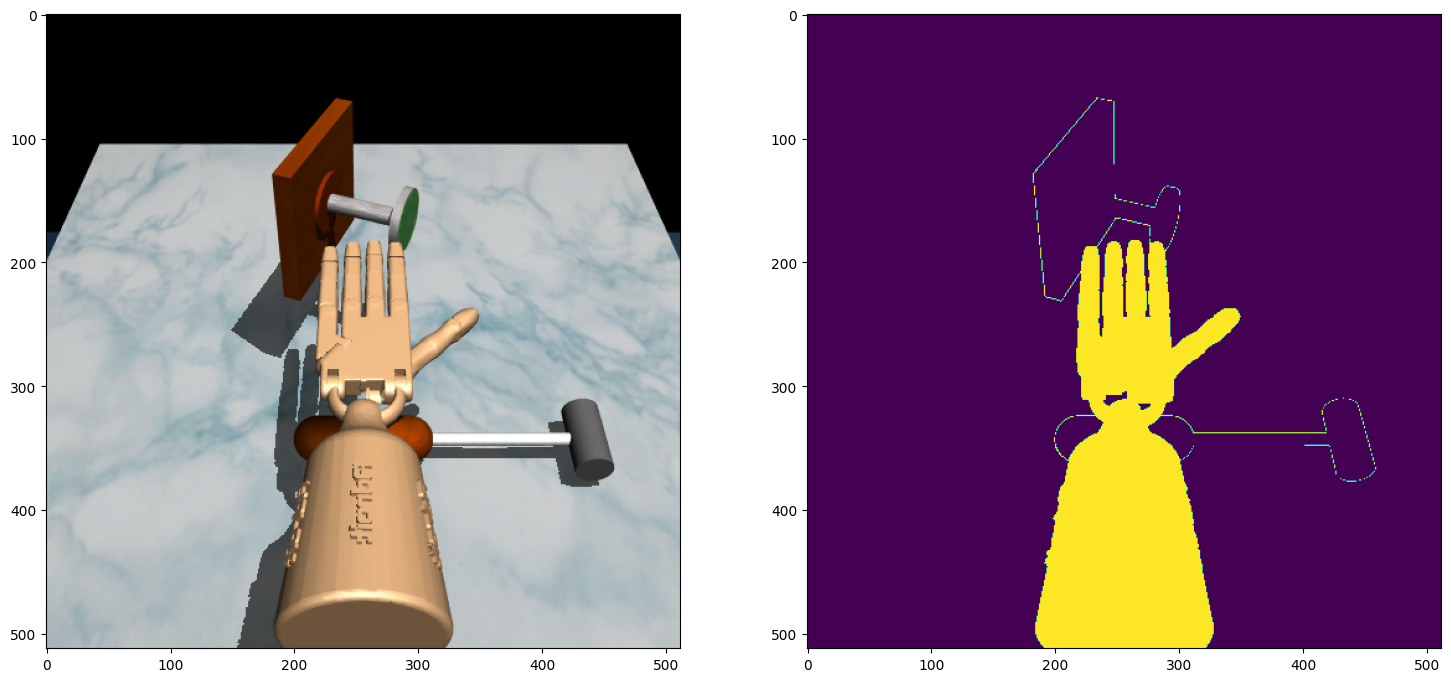

In [12]:
env.reset()

seg = env.sim.render(512,512,segmentation=True,camera_name='fixed')[::-1,::-1]
types = seg[:,:,0]
ids = seg[:,:,1]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, list(range(7,52))))

img_copy = env.sim.render(512,512,camera_name='fixed')[::-1,::-1]
# img_copy[np.stack([robot_mask, robot_mask, robot_mask]).transpose(1,2,0)] = 255

fig, axes = plt.subplots(1,2, figsize=(18,9))
axes[0].imshow(img_copy)
axes[1].imshow(robot_mask)
plt.show()
plt.close(fig)

# Metaworld

In [ ]:
env = make_metaworld("hammer-v2", frame_stack=3, action_repeat=2, discount=0.99,
    seed=14, camera_name="corner2", add_segmentation_to_obs=True)

In [8]:
# Record videos of metaworld task

robot_ids = list(range(8, 35))
import numpy as np
time_step = env.reset()

frames = [env.sim.render(512,512,camera_name='corner2')]

seg = env.sim.render(512,512,segmentation=True,camera_name='corner2')
types = seg[:,:,0]
ids = seg[:,:,1]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, robot_ids))
masks = [robot_mask]

done = False
total_reward = 0
while not time_step.last():
    time_step = env.step(env.action_space.sample())

    frames.append(env.sim.render(512,512,camera_name='corner2'))

    seg = env.sim.render(512,512,segmentation=True,camera_name='corner2')
    types = seg[:,:,0]
    ids = seg[:,:,1]
    robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, robot_ids))
    masks.append(robot_mask)

imageio.mimsave("metaworld_hammer.mp4", frames, fps=20)
masks = [np.stack([mask,mask,mask]).transpose(1,2,0).astype(np.uint8) * 255 for mask in masks]
imageio.mimsave("metaworld_hammer_masks.mp4", masks, fps=20)

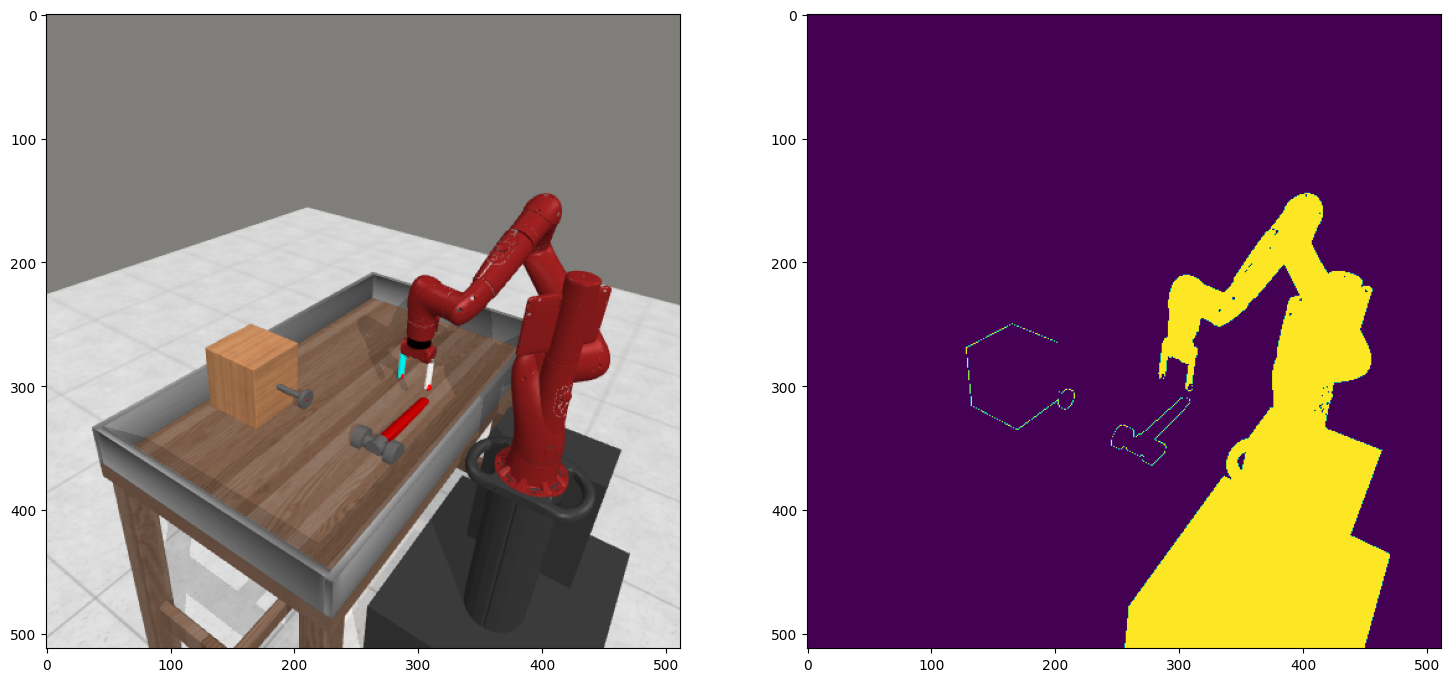

In [9]:
env.reset()

seg = env.sim.render(512,512,segmentation=True,camera_name='corner2')
types = seg[:,:,0]
ids = seg[:,:,1]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, list(range(8, 35))))

img_copy = env.sim.render(512,512,camera_name='corner2')
# img_copy[np.stack([robot_mask, robot_mask, robot_mask]).transpose(1,2,0)] = 255

fig, axes = plt.subplots(1,2, figsize=(18,9))
axes[0].imshow(img_copy)
axes[1].imshow(robot_mask)
plt.show()
plt.close(fig)

# Franka Kitchen

In [ ]:
env = gym.make("kitchen-complete-v0")

In [ ]:
# Record videos of kitchen task

robot_ids = list(range(2,49))
import numpy as np
time_step = env.reset()

frame = env.sim.render(256,256)
frame = frame[85:85+84, 90:90+84]
frames = [frame]

seg = env.sim.render(256,256,segmentation=True)
types = seg[:,:,1]
ids = seg[:,:,0]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, robot_ids))
robot_mask = robot_mask[85:85+84, 90:90+84]
masks = [robot_mask]

done = False
total_reward = 0
while not done:
    _,_,done,_ = env.step(env.action_space.sample())

    frame = env.sim.render(256,256)
    frame = frame[85:85+84, 90:90+84]
    frames.append(frame)

    seg = env.sim.render(256,256,segmentation=True)
    types = seg[:,:,1]
    ids = seg[:,:,0]
    robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, robot_ids))
    robot_mask = robot_mask[85:85+84, 90:90+84]
    masks.append(robot_mask)

imageio.mimsave("kitchen.mp4", frames, fps=20)
masks = [np.stack([mask,mask,mask]).transpose(1,2,0).astype(np.uint8) * 255 for mask in masks]
imageio.mimsave("kitchen_masks.mp4", masks, fps=20)

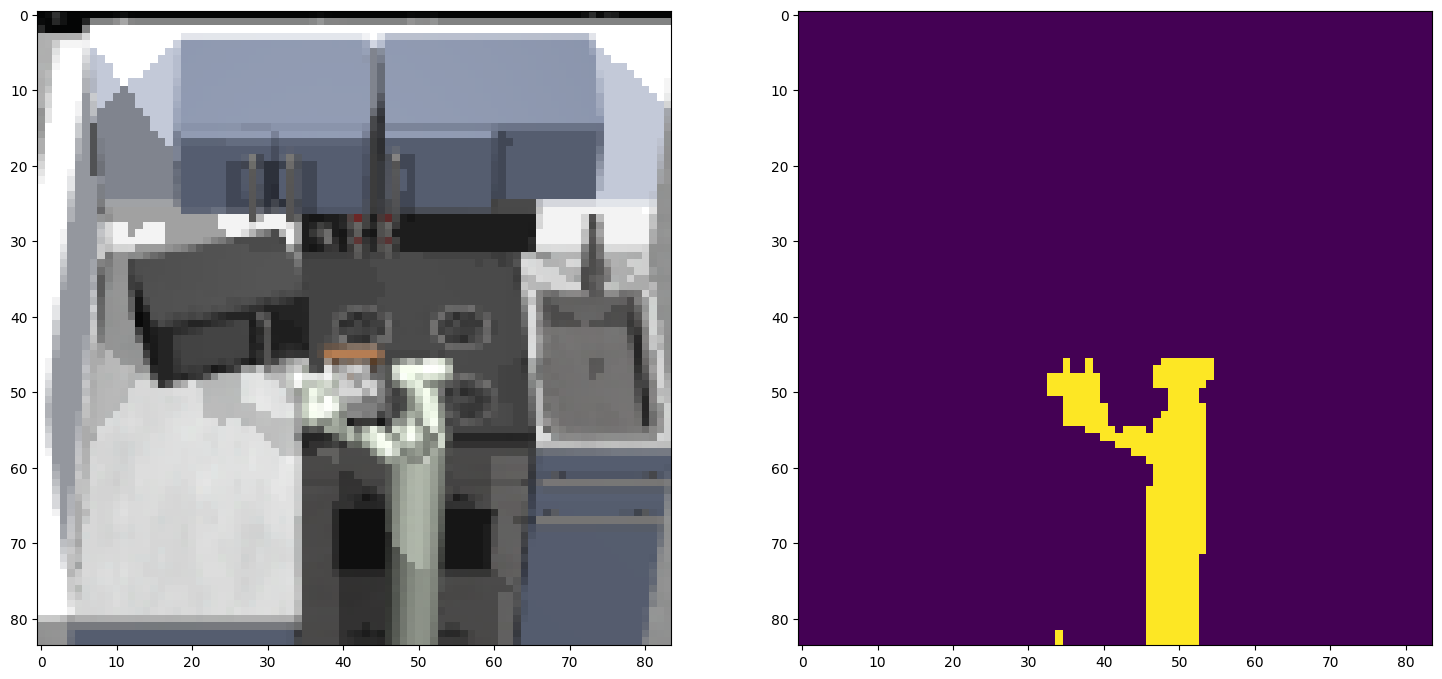

In [28]:
env.reset()

seg = env.sim.render(256,256,segmentation=True)
types = seg[:,:,1]
ids = seg[:,:,0]
robot_mask = np.logical_and(types==const.OBJ_GEOM, np.isin(ids, list(range(2, 49))))

img_copy = env.sim.render(256,256)
# img_copy = img_copy[int(256/2)-42:256+42, int(256/2)-42:256+42]
# robot_mask = robot_mask[int(256/2)-42:256+42, int(256/2)-42:256+42]
img_copy = img_copy[85:85+84, 90:90+84]
robot_mask = robot_mask[85:85+84, 90:90+84]
# img_copy[np.stack([robot_mask, robot_mask, robot_mask]).transpose(1,2,0)] = 255

fig, axes = plt.subplots(1,2, figsize=(18,9))
axes[0].imshow(img_copy)
axes[1].imshow(robot_mask)
plt.show()
plt.close(fig)

# Other

In [ ]:
# Getting the ID's for segmentation:

# Method 1: Look Directly at Geom Names (These aren't always specified)
[env.sim.model.geom_id2name(i) for i in range(env.sim.model.ngeom)]

# Method 2: Look at body names, and then find geom ids from body names
[env.sim.model.body_id2name(i) for i in range(env.sim.model.nbody)]
env.sim.model.body_geomadr[4]